In [1]:
import os
import json
import pandas as pd

In [2]:
BASE_DIR = "/content/drive/MyDrive/NLP_ENSAE/"
json_name = "Digital_Music.json"
os.chdir(BASE_DIR)

In [3]:
df = pd.read_json(os.path.join(BASE_DIR, json_name), lines = True)

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"12 22, 2013",A1ZCPG3D3HGRSS,0001388703,{'Format:': ' Audio CD'},mark l. massey,This is a great cd full of worship favorites!!...,Great worship cd,1387670400,NaN,NaN
1,5,True,"09 11, 2013",AC2PL52NKPL29,0001388703,{'Format:': ' Audio CD'},Norma Mushen,"So creative! Love his music - the words, the ...",Gotta listen to this!,1378857600,NaN,NaN
2,5,True,"03 2, 2013",A1SUZXBDZSDQ3A,0001388703,{'Format:': ' Audio CD'},Herbert W. Shurley,"Keith Green, gone far to early in his carreer,...",Great approach still gets the message out,1362182400,NaN,NaN
3,5,True,"12 2, 2012",A3A0W7FZXM0IZW,0001388703,{'Format:': ' Audio CD'},Mary M Raybell,Keith Green had his special comedy style of Ch...,Great A must have,1354406400,NaN,NaN
4,5,False,"01 7, 2012",A12R54MKO17TW0,0001388703,{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,1325894400,6,NaN


In [5]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from functools import reduce
from operator import add
from termcolor import colored


In [6]:
columns = list(df.columns)

In [7]:
df.describe()

,overall,unixReviewTime
count,1.584082e+06,1.584082e+06
mean,4.660555e+00,1.408211e+09
std,8.440314e-01,7.857646e+07
min,1.000000e+00,8.773056e+08
25%,5.000000e+00,1.374883e+09
50%,5.000000e+00,1.420070e+09
75%,5.000000e+00,1.457222e+09
max,5.000000e+00,1.538438e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584082 entries, 0 to 1584081
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1584082 non-null  int64 
 1   verified        1584082 non-null  bool  
 2   reviewTime      1584082 non-null  object
 3   reviewerID      1584082 non-null  object
 4   asin            1584082 non-null  object
 5   style           1310814 non-null  object
 6   reviewerName    1584001 non-null  object
 7   reviewText      1582629 non-null  object
 8   summary         1583547 non-null  object
 9   unixReviewTime  1584082 non-null  int64 
 10  vote            124722 non-null   object
 11  image           6591 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 134.5+ MB


In [9]:
df = df.drop(['image', 'reviewerID', 'asin'], axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584082 entries, 0 to 1584081
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1584082 non-null  int64 
 1   verified        1584082 non-null  bool  
 2   reviewTime      1584082 non-null  object
 3   style           1310814 non-null  object
 4   reviewerName    1584001 non-null  object
 5   reviewText      1582629 non-null  object
 6   summary         1583547 non-null  object
 7   unixReviewTime  1584082 non-null  int64 
 8   vote            124722 non-null   object
dtypes: bool(1), int64(2), object(6)
memory usage: 98.2+ MB


In [11]:
df['overall'].describe()

count    1.584082e+06
mean     4.660555e+00
std      8.440314e-01
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [12]:
from matplotlib import pyplot as plt


In [13]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113550 entries, 0 to 113549
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   index           113550 non-null  int64 
 1   overall         113550 non-null  int64 
 2   verified        113550 non-null  bool  
 3   reviewTime      113550 non-null  object
 4   style           113550 non-null  object
 5   reviewerName    113550 non-null  object
 6   reviewText      113550 non-null  object
 7   summary         113550 non-null  object
 8   unixReviewTime  113550 non-null  int64 
 9   vote            113550 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 7.9+ MB


In [15]:
INDEX, TARGET = 'index', 'overall'

In [18]:
cols = [ 'verified', 'reviewTime', 
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'vote']

In [19]:
X, y = df[cols], df[TARGET]

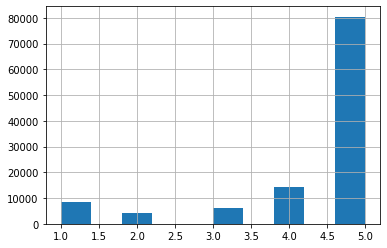

In [20]:
%matplotlib inline

y.hist()
plt.show()

Unbalanced Data

In [21]:
df.dtypes

index              int64
overall            int64
verified            bool
reviewTime        object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
vote              object
dtype: object

In [22]:
df[['reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'vote']].head()

KeyError: ignored

# Analyse

In [23]:
from wordcloud.wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stops = set(stopwords.words('english'))
stops.add('&')
stops.add('-')
stops.add(',')
stops.add('.')
print(stops)

STOPWORDS = {'during', "you've", 'any', 'i', 'our', 'these', 'about', 'at', 'your', 'having', 'have', 'did', 'for', 'here', 
             'what', "you'll", 't', 'does', "you're", 'ma', 'didn', 'being', 'ain', 'yours', 'each', 'just', 'should', 
             'a', 'she', 'this', 'ours', 'am', 'themselves', 'that', 'yourself', 'theirs',
             'them', 'wasn', 'he', 'aren', 'above', 'by', 's', 'now', 'their', 'once', ',', 've', 'where', 'and', 'to', 
             'until', 'myself', 'couldn', "isn't", 'ourselves', 'nor', 'herself', 'are', "won't", 'itself', '-', 
             'all', 'weren', 'doing', 'has', 'too', 'won', 'into', 'don', 'how', 'on', "mightn't", 'll', 'hadn', 'wouldn', "didn't",
             'do','been', "doesn't", 'm', 'if', "aren't", 'before', 'her', '.', "hadn't", "wouldn't",
             'an', "she's", 'why', 'with', 'shan', 'some', "should've", 'isn', 'which', "shouldn't", 'other', "couldn't", 
             "weren't", 'had', 'again', 'they', 'be', 'or', 'when', 'yourselves', 'no', 'against', "that'll", 'haven', 'you', 'we',
             'same', 'doesn', "shan't", 'himself', 'because', 'as', 'after', 'shouldn', "it's", 'more', 'him', 'there', 'whom', 'not',
             "haven't", "mustn't", 'such', 'but', 'both', "hasn't", 'under', 'then', 'it', 'hasn', '&', 'below', 'is', 'his', "don't",
             'y', "you'd", 're', 'hers', 'through', 'o', 'd', 'will', "wasn't", 'while', 'me', 'down', 'mightn', 'was', 'my', 'of', 'its',
             'were', 'needn', 'the', 'who', 'from', 'own', 'those','.', 'it'}


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'above', 'any', 'does', 'hers', 'your', '.', 'mightn', "haven't", 'did', 'on', 'herself', 'too', 'further', "mightn't", 'after', 'just', "don't", 'whom', "won't", "hadn't", 's', 'such', 'once', 'm', 'down', 'no', 'off', 'isn', 'that', 'when', '&', 'had', 'other', 'from', 'same', "couldn't", 'weren', 'during', "you'll", 'shouldn', 'shan', 'don', 'itself', 'here', 'its', 'it', 'my', "mustn't", "needn't", 'wasn', "didn't", 'themselves', 'before', 'than', 'll', 'ma', "shouldn't", 'o', "doesn't", 'all', 'in', '-', 'having', 'is', 'y', 'but', 'between', 'into', ',', "weren't", 'those', 'himself', 'yourselves', 'am', 'and', 'against', 'now', 'doing', 'nor', 'hasn', 'then', "she's", 'as', 'haven', 'ain', 'won', 'which', "you'd", 'why', 'through', 'me', 'his', 'with', 'some', 've', 'not', 'doesn', 'you', 'below', 'up', 'we', 'if', 'more', "wouldn't", 'should', 'mustn', "you're", "aren

In [24]:
import regex as re
df['reviewText'] = df['reviewText'].apply(lambda x: str(x).lower())
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub('\w*\d\w*','', x))
#data_df['reviews.title'] = data_df['reviews.title'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [25]:
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split(' ') if (w not in stops)]))

In [26]:
corpus=[]
corpus = [w for s in df['reviewText'].str.split().values.tolist() for w in s]

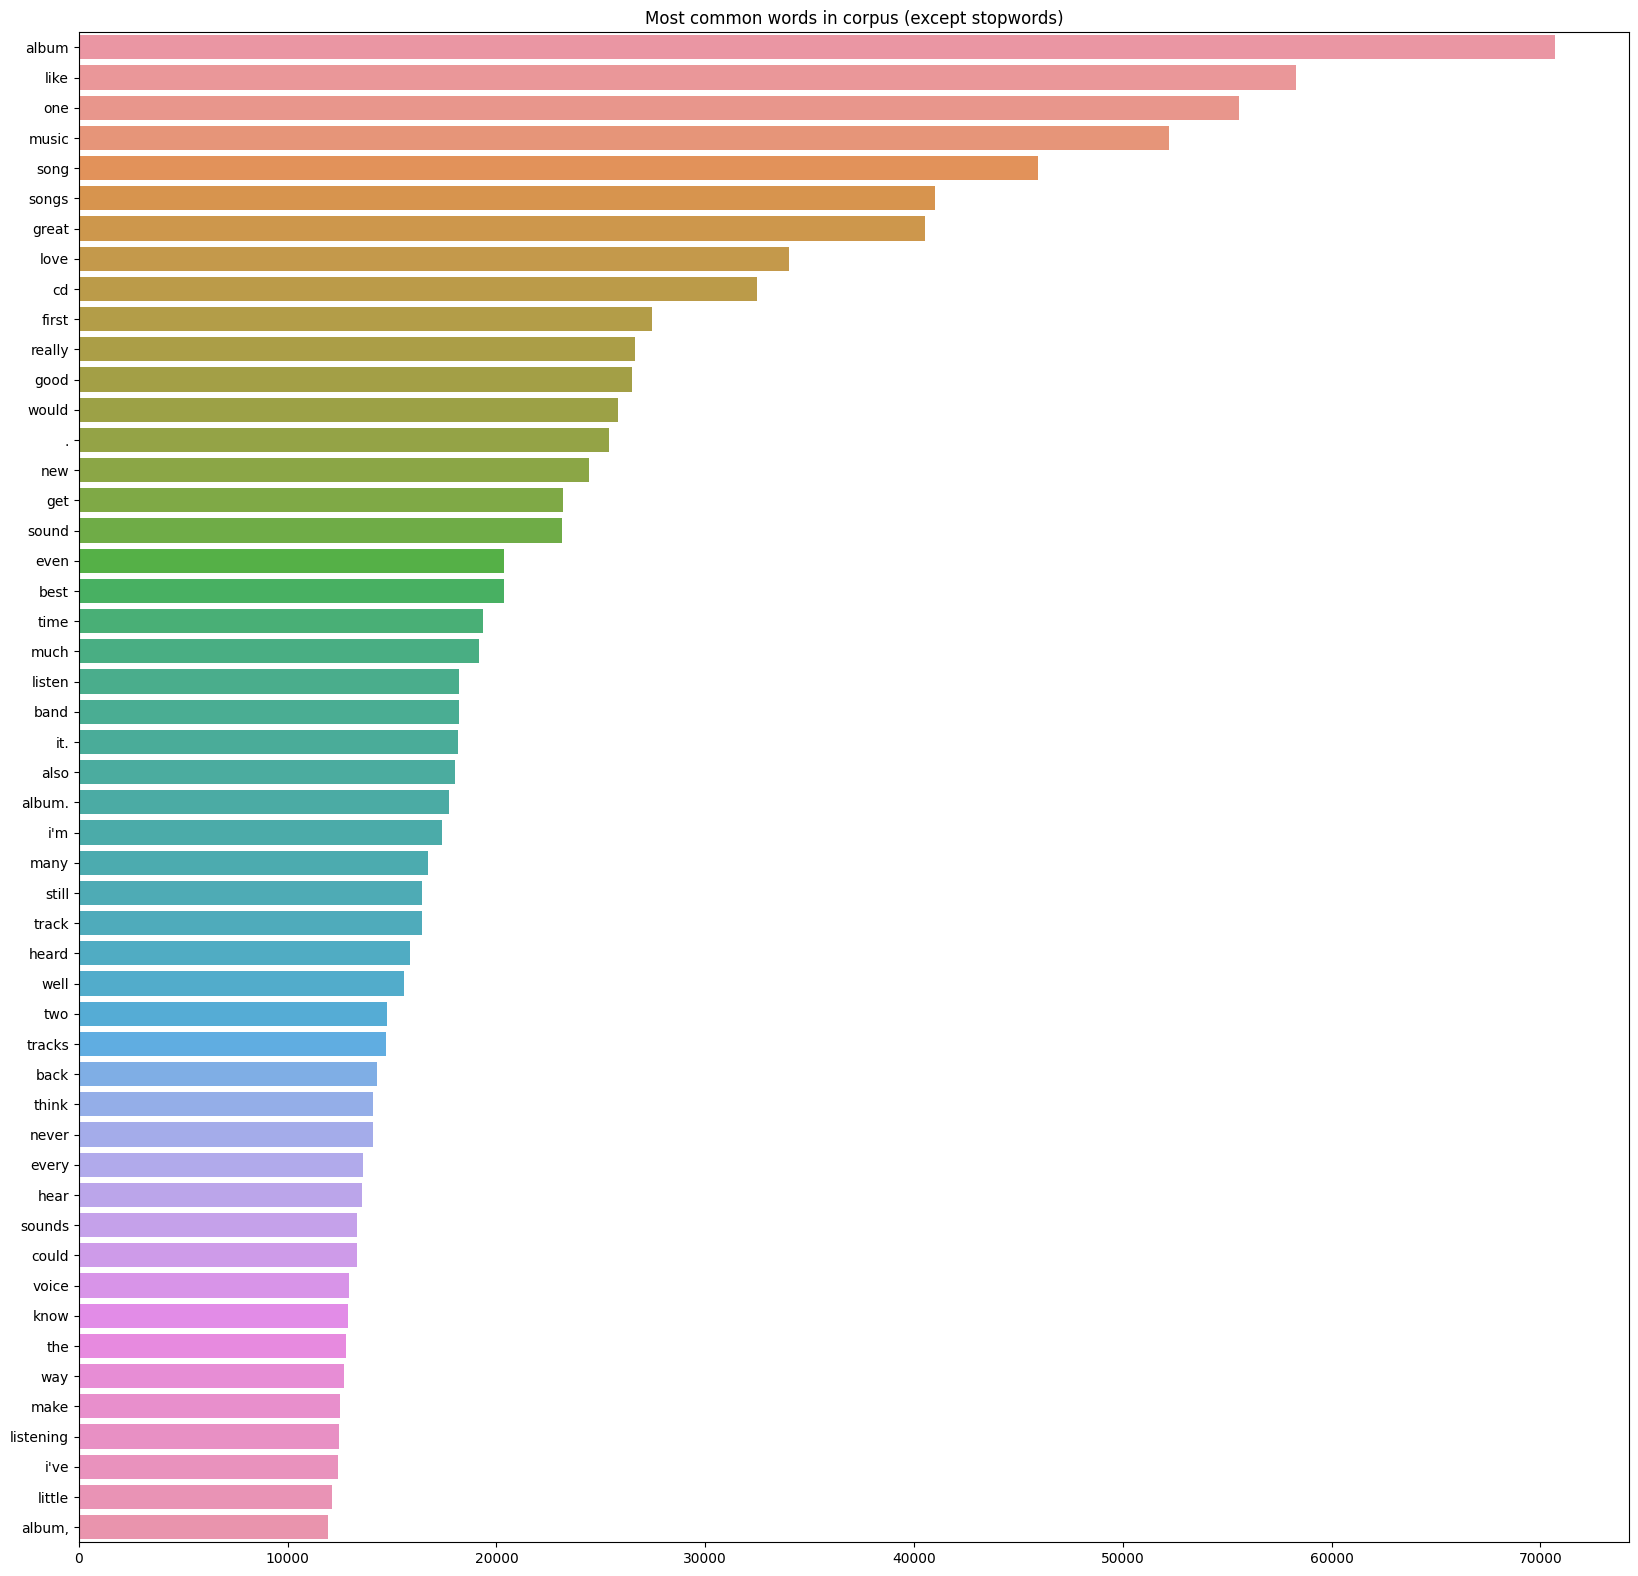

In [27]:
import seaborn as sns 
import collections
from collections import defaultdict

counter = collections.Counter(corpus)
most_common_words = counter.most_common()

x, y= [], []
for word,count in most_common_words[:50]:
    x.append(word)
    y.append(count)

fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(20, 20), dpi=100)
sns.barplot(x=y,y=x)
plt.title('Most common words in corpus (except stopwords)')
plt.show()

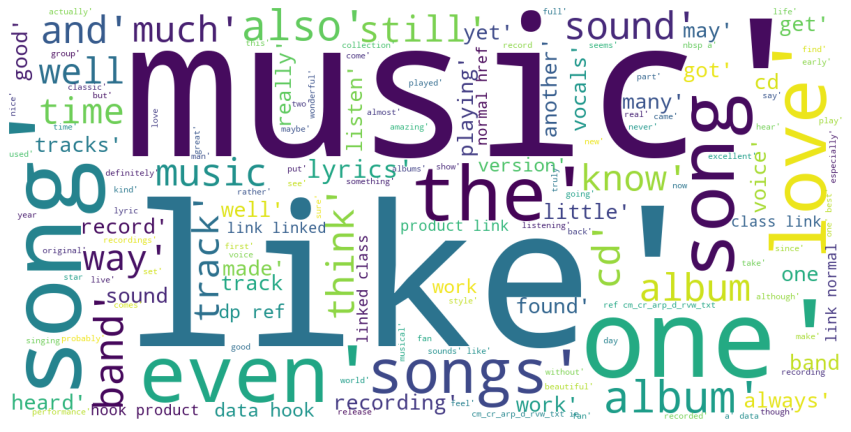

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color='white',
    max_words=150,
    scale=3,
    random_state=1)

wordcloud=wordcloud.generate(str(corpus))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [29]:
def draw_pie(data,title=None):

    fig = plt.figure(1, figsize=(16, 14))

    count=[]
    labels=[]
    for i in range(max(data['overall'])+1):
        labels.append(f'{i} star')
        count.append((data['overall'] == i).sum())

    colors = ['b','b','r','g','m','y']
    explode = [0,0,0,0,0,0.1]
    plt.subplot(1,2,1)
    plt.pie(count, labels=labels, colors=colors, explode=explode,
            autopct='%1.2f%%')
    plt.title(title)
    

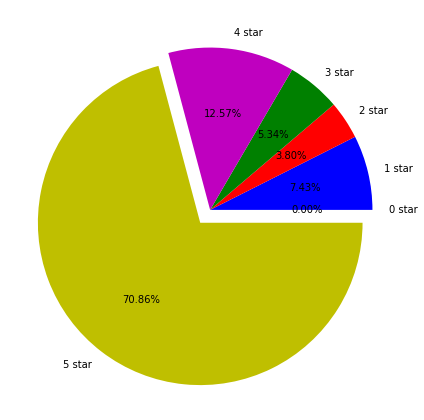

In [30]:
draw_pie(df)

# Preprocessing

In [31]:
! pip install transformers

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 45.7 MB/s 
     |████████████████████████████████| 596 kB 49.6 MB/s 
     |████████████████████████████████| 6.5 MB 22.3 MB/s 
     |████████████████████████████████| 77 kB 6.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [32]:
from transformers import AutoTokenizer
model_checkpoint = 'distilgpt2'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [33]:
df['reviewText'][0]

'keith green / wanna go back egypt...:  album keith gets serious messages across best examples wonderful humor.\nbob dylan plays harmonica album.\nfive stars'

In [34]:
tokenizer(df['reviewText'][0])

{'input_ids': [365, 342, 4077, 1220, 18869, 467, 736, 304, 6022, 986, 25, 220, 5062, 885, 342, 3011, 2726, 6218, 1973, 1266, 6096, 7932, 14733, 13, 198, 65, 672, 288, 18554, 5341, 25625, 3970, 5062, 13, 198, 13261, 5788], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [35]:
import torch
max_len = 500
pad_to_max = False
def tokenize_data(example):
    # Tokenize the review body
    text_ = example['style']['Format:'] + " " + example['reviewText'] 
    encodings = tokenizer.encode_plus(text_, pad_to_max_length=pad_to_max, max_length=max_len,
                                           add_special_tokens=True,
                                            return_token_type_ids=False,
                                            return_attention_mask=True,
                                            return_overflowing_tokens=False,
                                            return_special_tokens_mask=False,
                                           )
    
    # Subtract 1 from labels to have them in range 0-4
    targets = torch.tensor(example['overall']-1,dtype=torch.long)
    

    encodings.update({'labels': targets})
    return encodings


In [47]:
df.shape[0]*0.7

79485.0

In [54]:
df_train, df_val, df_eval = df.iloc[:int(df.shape[0]*0.7)][['style','reviewText', 'overall']], df.iloc[int(df.shape[0]*0.7): int(df.shape[0]*0.8)][['style','reviewText','overall']] , df.iloc[int(df.shape[0]*0.8):][['style','reviewText', 'overall']]

In [55]:
#tqdm.pandas()

encoded_train = df_train.apply(tokenize_data, axis = 1)
encoded_val = df_val.apply(tokenize_data, axis = 1)
encoded_eval = df_eval.apply(tokenize_data, axis = 1)

In [56]:
encoded_train[35405]

{'input_ids': [4904, 18, 7849, 545, 8873, 11, 705, 354, 392, 418, 24577, 6, 25246, 1085, 2364, 13, 1683, 2982, 45610, 1317, 257, 1040, 1636, 865, 2621, 651, 1637, 338, 2861, 7427, 3478, 273, 13, 635, 6276, 7263, 11, 1612, 705, 15410, 6, 9290, 11, 3616, 1661, 79, 504, 220, 6597, 22927, 16472, 357, 11246, 467, 625, 737, 198, 198, 62, 354, 392, 418, 24577, 357, 11085, 9004, 8, 198, 14261, 1021, 417, 3091, 685, 15410, 2361, 2488, 1220, 2488, 442, 392, 418, 24577, 220, 37250, 78, 48977, 15876, 6, 2361, 7813, 69, 11339, 198, 14261, 1021, 417, 3091, 685, 15410, 2361, 2488, 1220, 2488, 21065, 26441, 25, 48977, 15876, 11, 9838, 8604, 26, 4691, 15876, 9675, 1108, 198, 14261, 1021, 417, 3091, 685, 15410, 2361, 2488, 1220, 2488, 46955, 7043, 316, 25, 304, 9838, 1654, 15876, 467, 198, 14261, 1021, 417, 3091, 685, 15410, 2361, 2488, 1220, 2488, 21628, 26441, 25, 467, 835, 17435, 5176, 13992, 198, 14261, 1021, 417, 3091, 685, 15410, 2361, 2488, 1220, 2488, 410, 15876, 43210, 11, 17703, 45697, 198, 14

In [57]:
def pad_seq(seq, max_batch_len, pad_value):
    return seq + (max_batch_len - len(seq)) * [pad_value]
from dataclasses import dataclass, field
from transformers import DataCollator
@dataclass
class SmartCollator():
    pad_token_id: int

    def __call__(self, batch):
        batch_inputs = list()
        batch_attention_masks = list()
        labels = list()
        max_size = max([len(ex['input_ids']) for ex in batch])
        for item in batch:
            batch_inputs += [pad_seq(item['input_ids'], max_size, self.pad_token_id)]
            batch_attention_masks += [pad_seq(item['attention_mask'], max_size, 0)]
            labels.append(item['labels'])

        return {"input_ids": torch.tensor(batch_inputs, dtype=torch.long),
                "attention_mask": torch.tensor(batch_attention_masks, dtype=torch.long),
                "labels": torch.tensor(labels, dtype=torch.long)
                }

In [58]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
batch_size = 8
num_labels = 5

resume_training = False
if resume_training:
    model_checkpoint = 'test-results/checkpoint-20000'
else:
    model_checkpoint = 'distilgpt2'
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

loading configuration file https://huggingface.co/distilgpt2/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/f985248d2791fcff97732e4ee263617adec1edb5429a2b8421734c6d14e39bee.422318838d1ec4e061efb4ea29671cb2a044e244dc69229682bebd7cacc81631
Model config GPT2Config {
  "_name_or_path": "distilgpt2",
  "_num_labels": 1,
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 6,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0

The warning is telling us we are throwing away some weights (the vocab_transform and vocab_layer_norm layers) and randomly initializing some other (the pre_classifier and classifier layers). This is absolutely normal in this case, because we are removing the head used to pretrain the model on a masked language modeling objective and replacing it with a new head for which we don't have pretrained weights, so the library warns us we should fine-tune this model before using it for inference, which is exactly what we are going to do.

In [59]:
metric_name = "accuracy"

args = TrainingArguments(
    output_dir = "results",
    seed = 123, 
    evaluation_strategy = "steps",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    eval_steps = 5000,
    save_steps = 5000,
    fp16 = True

)




PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [60]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
 
    predictions = np.argmax(predictions, axis=1)

    return metric.compute(predictions=predictions, references=labels)

In [61]:
validation_key = "validation"
trainer = Trainer(
    model,
    args,
    train_dataset= encoded_train, 
    eval_dataset=encoded_eval,
    data_collator=SmartCollator(pad_token_id=tokenizer.pad_token_id),
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Using amp half precision backend


In [62]:
! pip install datasets
from datasets import load_dataset, load_metric
metric = load_metric('accuracy')


In [63]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 79485
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 29808


TypeError: ignored